In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


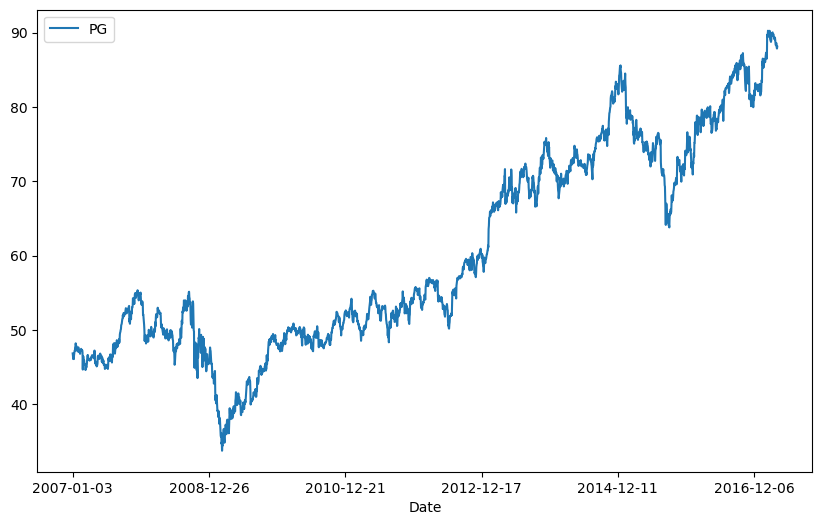

In [4]:
data.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

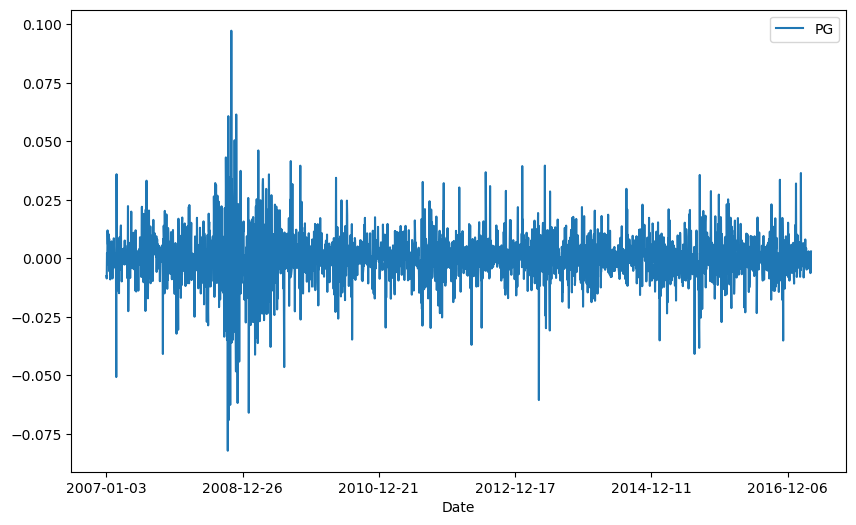

In [5]:
log_returns.plot(figsize = (10, 6))

In [5]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [6]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [7]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [8]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [9]:
type(drift)

pandas.core.series.Series

In [10]:
type(stdev)

pandas.core.series.Series

In [11]:
np.array(drift)

array([0.00018236])

In [12]:
drift.values

array([0.00018236])

In [13]:
stdev.values

array([0.0111381])

In [14]:
norm.ppf(0.95)

1.6448536269514722

In [15]:
x = np.random.rand(10, 2)
x

array([[0.56293009, 0.13272099],
       [0.04544269, 0.73610423],
       [0.89259741, 0.25846983],
       [0.74510828, 0.78159229],
       [0.00557247, 0.02561345],
       [0.69002144, 0.87066744],
       [0.32082301, 0.22910297],
       [0.36623077, 0.32227901],
       [0.72844062, 0.79908703],
       [0.60330166, 0.90041504]])

In [16]:
norm.ppf(x)

array([[ 0.15840227, -1.11362059],
       [-1.69074566,  0.63138084],
       [ 1.24046031, -0.64807002],
       [ 0.65917495,  0.77758208],
       [-2.53812106, -1.94957419],
       [ 0.49591111,  1.12955183],
       [-0.46539862, -0.74180425],
       [-0.34185298, -0.46133537],
       [ 0.60810362,  0.83836463],
       [ 0.26190241,  1.28392011]])

In [17]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.08794184,  0.47227357],
       [-0.54751704,  1.9284287 ],
       [-2.28237457, -0.58011087],
       [ 0.88865248,  0.31245526],
       [-1.47476298,  1.6645609 ],
       [-0.23644778, -1.49756868],
       [-0.30772859, -0.46239741],
       [ 1.09581173, -0.03304609],
       [ 0.00541322, -2.39447902],
       [ 1.1693209 ,  1.22701279]])

In [18]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[0.99622422, 0.99475496, 0.9942056 , ..., 0.99821955, 1.00145428,
        1.00529453],
       [1.00081474, 0.9901655 , 1.00471415, ..., 1.00853444, 0.99295196,
        0.99157811],
       [0.98289739, 0.96696142, 1.02240862, ..., 1.01390008, 0.99108694,
        0.98961805],
       ...,
       [1.00649137, 0.99126258, 1.00223807, ..., 0.99104631, 1.00637882,
        0.99579035],
       [0.98148823, 1.01675005, 1.00975479, ..., 1.00138651, 0.99206082,
        0.99802304],
       [0.99190313, 0.99815065, 1.02792454, ..., 1.00419377, 1.00102502,
        1.0123832 ]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.19042291,  87.25202663,  88.53403372, ...,  88.87067245,
         87.49756533,  87.37650318],
       [ 86.68213663,  84.36934333,  90.51795885, ...,  90.10598178,
         86.71769438,  86.46936499],
       ...,
       [ 97.80199087, 112.89739586, 113.00832495, ...,  96.86540267,
         90.9683817 ,  71.15335746],
       [ 95.99150318, 114.78843321, 114.11069707, ...,  96.99970753,
         90.24616694,  71.01269014],
       [ 95.21427217, 114.57614966, 117.29718629, ...,  97.40650204,
         90.33867082,  71.89205441]])

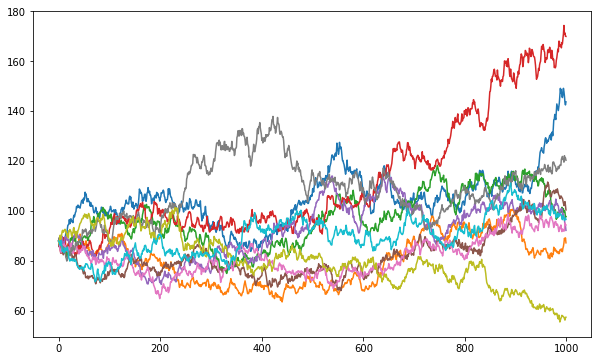

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);